## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

## GOAL: to understand the popularity and quality of the series varied over time

In [1]:
# First, take a quick glance at the data
import pandas as pd
office_df = pd.read_csv("datasets/office_episodes.csv")
office_df[0:5]

episode_number  season  episode_title  \
0               0       1          Pilot   
1               1       1  Diversity Day   
2               2       1    Health Care   
3               3       1   The Alliance   
4               4       1     Basketball   

                                         description  ratings  votes  \
0  The premiere episode introduces the boss and s...      7.5   4936   
1  Michael's off color remark puts a sensitivity ...      8.3   4801   
2  Michael leaves Dwight in charge of picking the...      7.8   4024   
3  Just for a laugh, Jim agrees to an alliance wi...      8.1   3915   
4  Michael and his staff challenge the warehouse ...      8.4   4294   

   viewership_mil  duration release_date guest_stars         director  \
0            11.2        23   2005-03-24         NaN       Ken Kwapis   
1             6.0        23   2005-03-29         NaN       Ken Kwapis   
2             5.8        22   2005-04-05         NaN  Ken Whittingham   
3             5.4        23   2005-04-12         NaN     Bryan Gordon   
4             5.0        23   2005-04-19         NaN     Greg Daniels   

                                            writers  has_guests  \
0  Ricky Gervais |Stephen Merchant and Greg Daniels       False   
1                                       B. J. Novak       False   
2                                  Paul Lieberstein       False   
3                                     Michael Schur       False   
4                                      Greg Daniels       False   

   scaled_ratings  
0         0.28125  
1         0.53125  
2         0.37500  
3         0.46875  
4         0.56250

In [2]:
office_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   episode_number  188 non-null    int64  
 1   season          188 non-null    int64  
 2   episode_title   188 non-null    object 
 3   description     188 non-null    object 
 4   ratings         188 non-null    float64
 5   votes           188 non-null    int64  
 6   viewership_mil  188 non-null    float64
 7   duration        188 non-null    int64  
 8   release_date    188 non-null    object 
 9   guest_stars     29 non-null     object 
 10  director        188 non-null    object 
 11  writers         188 non-null    object 
 12  has_guests      188 non-null    bool   
 13  scaled_ratings  188 non-null    float64
dtypes: bool(1), float64(3), int64(4), object(6)
memory usage: 19.4+ KB


In [3]:
# get an idea of what the complete list of guests in the office were

guests = office_df[office_df['has_guests'] == True]
guests.head()

episode_number  season        episode_title  \
5                5       1             Hot Girl   
8                8       2      Office Olympics   
9                9       2             The Fire   
12              12       2           The Client   
14              14       2  E-Mail Surveillance   

                                          description  ratings  votes  \
5   Michael is just one of the many male staff who...      7.7   3854   
8   Ready to finalize his deal for a new condo, Mi...      8.4   3665   
9   A fire in the kitchen relegates the staff to t...      8.4   3607   
12  With Michael and Jan Levinson-Gould away from ...      8.6   3533   
14  Michael decides to set up e-mail surveillance ...      8.4   3338   

    viewership_mil  duration release_date   guest_stars        director  \
5              4.8        23   2005-04-26     Amy Adams  Amy Heckerling   
8              8.3        22   2005-10-04  Nancy Carell       Paul Feig   
9              7.6        22   2005-10-11     Amy Adams      Ken Kwapis   
12             7.5        22   2005-11-08   Tim Meadows    Greg Daniels   
14             8.1        23   2005-11-22     Ken Jeong       Paul Feig   

             writers  has_guests  scaled_ratings  
5       Mindy Kaling        True         0.34375  
8      Michael Schur        True         0.56250  
9        B. J. Novak        True         0.56250  
12  Paul Lieberstein        True         0.62500  
14  Jennifer Celotta        True         0.56250

## TASK 1
Create a matplotlib scatter plot of the data that contains the following attributes:

* Each episode's episode number plotted along the x-axis
* Each episode's viewership (in millions) plotted along the y-axis
* A color scheme reflecting the scaled ratings (not the regular ratings) of each episode, such that:
* Ratings < 0.25 are colored "red"
* Ratings >= 0.25 and < 0.50 are colored "orange"
* Ratings >= 0.50 and < 0.75 are colored "lightgreen"
* Ratings >= 0.75 are colored "darkgreen"
* A sizing system, such that episodes with guest appearances have a marker size of 250 and episodes without are sized 25
* A title, reading "Popularity, Quality, and Guest Appearances on the Office"
* An x-axis label reading "Episode Number"
* A y-axis label reading "Viewership (Millions)"


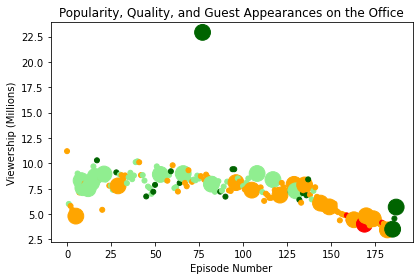

In [4]:
import matplotlib.pyplot as plt

# determine color of marker based off of scaled ratings
colors = []
for lab,row in office_df.iterrows():
    if row["scaled_ratings"] < 0.25 :
        colors.append("red")
    elif row["scaled_ratings"] >= 0.25 and row["scaled_ratings"] < 0.50:
        colors.append("orange")
    elif row["scaled_ratings"] >= 0.50 and row["scaled_ratings"] < 0.75:
        colors.append("lightgreen")
    else :
        colors.append("darkgreen")
        
# determine size of markers based off of guest appearances
marker_size = []
for lab,row in office_df.iterrows():
    if row["has_guests"] == True :
        marker_size.append(250)
    else :
        marker_size.append(25)
        
# create a scatter plot
fig = plt.figure()
plt.rcParams['figure.figsize'] = [11, 7]

plt.scatter(office_df["episode_number"],office_df["viewership_mil"],
           c = colors,
           s = marker_size)
plt.title('Popularity, Quality, and Guest Appearances on the Office')
plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")
plt.show()

## TASK 2
Provide the name of one of the guest stars (hint, there were multiple!) who was in the most watched Office episode. Save it as a string in the variable top_star (e.g. top_star = "Will Ferrell").

In [5]:
# find the dataframe with the max viewership_mil
most_watched_df = office_df.loc[office_df["viewership_mil"] 
                                == max(office_df["viewership_mil"])]
most_watched_df

episode_number  season  episode_title  \
77              77       5  Stress Relief   

                                          description  ratings  votes  \
77  Dwight's too-realistic fire alarm gives Stanle...      9.7   8170   

    viewership_mil  duration release_date  \
77           22.91        60   2009-02-01   

                                  guest_stars       director  \
77  Cloris Leachman, Jack Black, Jessica Alba  Jeffrey Blitz   

             writers  has_guests  scaled_ratings  
77  Paul Lieberstein        True         0.96875

In [6]:
top_star = "Cloris Leachman, Jack Black, Jessica Alba"

Alternate solution: create a new dataframe just for the outlier for this episode

In [7]:
print(office_df[office_df['viewership_mil'] > 15]['guest_stars'])

77    Cloris Leachman, Jack Black, Jessica Alba
Name: guest_stars, dtype: object


In [8]:
top_star = "Cloris Leachman, Jack Black, Jessica Alba"